In [ ]:
import cv2
import numpy as np

def paste_video(background_path, overlay_path, mask_path, output_path):
    # Open the background video
    cap_background = cv2.VideoCapture(background_path)
    fps = int(cap_background.get(cv2.CAP_PROP_FPS))
    width = int(cap_background.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap_background.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Read the overlay image with an alpha channel
    overlay = cv2.imread(overlay_path, cv2.IMREAD_UNCHANGED)

    # Read the binary mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Convert overlay and mask to uint_8
    overlay = overlay.astype(np.uint8)
    mask = mask.astype(np.uint8)

    # Find contours in the mask to get the bounding box
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Get the bounding box of the mask
        x, y, w, h = cv2.boundingRect(contours[0])

        # Resize overlay to fit inside the bounding box
        overlay = cv2.resize(overlay, (w, h))

    # Create VideoWriter object to save the output
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while True:
        ret, frame_background = cap_background.read()

        if not ret:
            break

        # Extract the region of interest from the background using the mask
        bg_roi = frame_background[y:y+h, x:x+w]

        # Extract the region of interest from the overlay using the mask
        overlay_roi = overlay[:h, :w]

        # Extract the alpha channel from the overlay
        alpha_channel = overlay_roi[:, :, 3] / 255.0

        # Blend the overlay with the background using the alpha channel
        for c in range(0, 3):
            bg_roi[:, :, c] = bg_roi[:, :, c] * (1 - alpha_channel) + overlay_roi[:, :, c] * alpha_channel

        # Update the background frame with the blended result
        frame_background[y:y+h, x:x+w] = bg_roi

        # Write the frame to the output video
        out.write(frame_background)

    # Release video capture and writer objects
    cap_background.release()
    out.release()

# Mention the paths to your video files
background_video_path = "/content/drive/MyDrive/blending_logo_for_blue_car/inpainted_video.mp4"
overlay_image_path = "/content/drive/MyDrive/blending_logo_for_blue_car/amazon_logo.png"
mask_image_path = "/content/drive/MyDrive/blending_logo_for_blue_car/mask.png"
output_video_path = "/content/drive/MyDrive/blending_logo_for_blue_car/amazon_logo_replaced.mp4"

# Perform video processing
paste_video(background_video_path, overlay_image_path, mask_image_path, output_video_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
from google.colab import files
from IPython.display import Image, display

def paste_image(background_path, overlay_path, mask_path, output_path):
    # Read the background image
    background = cv2.imread(background_path)

    # Read the overlay image with an alpha channel
    overlay = cv2.imread(overlay_path, cv2.IMREAD_UNCHANGED)

    # Read the binary mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Convert images and mask to uint8
    background = background.astype(np.uint8)
    mask = mask.astype(np.uint8)

    # Find contours in the mask to get the bounding box
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Get the bounding box of the mask
        x, y, w, h = cv2.boundingRect(contours[0])

        # Resize overlay to fit inside the bounding box
        overlay = cv2.resize(overlay, (w, h))

        # Extract the region of interest from the background using the mask
        bg_roi = background[y:y+h, x:x+w]

        # Extract the region of interest from the overlay using the mask
        overlay_roi = overlay[:h, :w]

        # Extract the alpha channel from the overlay
        alpha_channel = overlay_roi[:, :, 3] / 255.0

        # Blend the overlay with the background using the alpha channel
        for c in range(0, 3):
            bg_roi[:, :, c] = bg_roi[:, :, c] * (1 - alpha_channel) + overlay_roi[:, :, c] * alpha_channel

        # Update the background with the blended result
        background[y:y+h, x:x+w] = bg_roi

    # Save the output image
    cv2.imwrite(output_path, background)

# Mention the paths to your images
background_image_path = '/content/1_target.png'
overlay_image_path = '/content/visa.png'
mask_image_path = '/content/1_mask.png'
output_image_path = 'output.jpg'

# Perform image paste
paste_image(background_image_path, overlay_image_path, mask_image_path, output_image_path)

# Display the result
display(Image(filename=output_image_path))


IndexError: index 3 is out of bounds for axis 2 with size 3

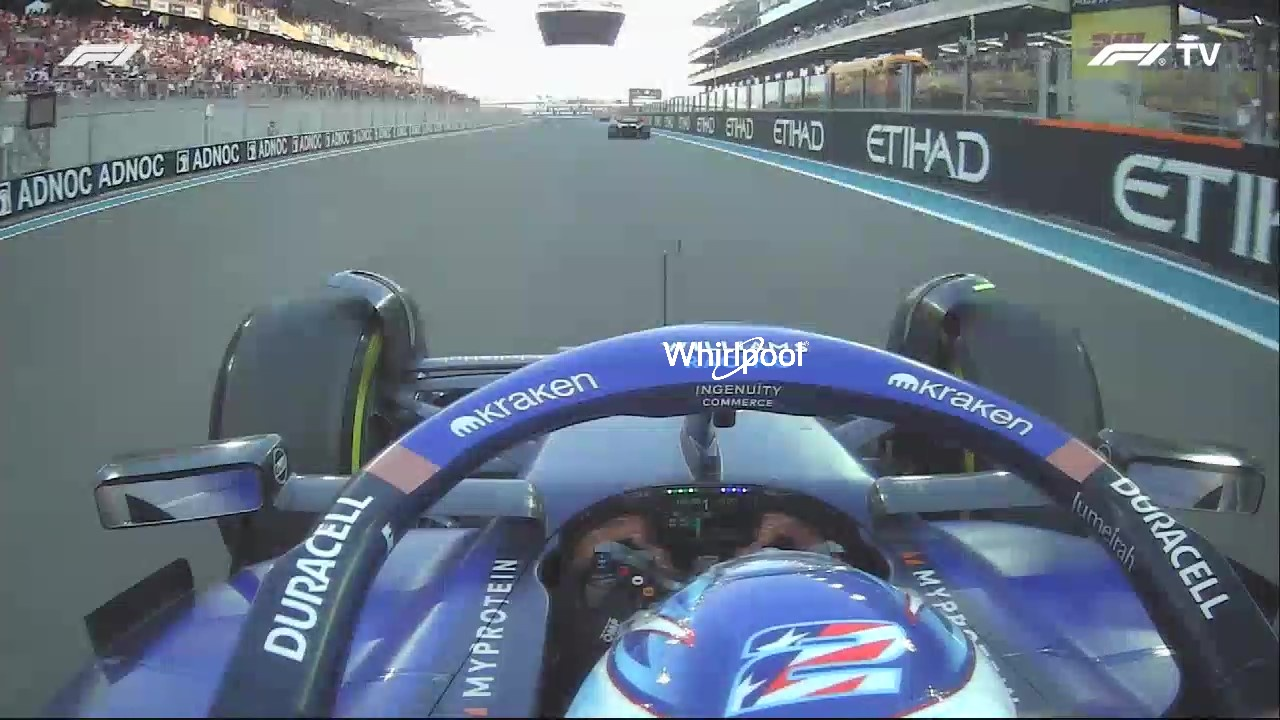

In [ ]:
import cv2
import numpy as np
from google.colab import files
from IPython.display import Image, display

def paste_image(background_path, overlay_path, mask_path, output_path):
    # Read the background image
    background = cv2.imread(background_path)

    # Read the overlay image with an alpha channel
    overlay = cv2.imread(overlay_path, cv2.IMREAD_UNCHANGED)

    # Read the binary mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Convert images and mask to uint8
    background = background.astype(np.uint8)
    mask = mask.astype(np.uint8)

    # Find contours in the mask to get the bounding box
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        # Get the bounding box of the mask
        x, y, w, h = cv2.boundingRect(contour)

        # Resize overlay to fit inside the bounding box
        overlay_resized = cv2.resize(overlay, (w, h))

        # Extract the region of interest from the background using the mask
        bg_roi = background[y:y+h, x:x+w]

        # Extract the region of interest from the overlay using the mask
        overlay_roi = overlay_resized

        # Extract the alpha channel from the overlay (create one if not present)
        alpha_channel = overlay_roi[:, :, 3] / 255.0 if overlay_roi.shape[2] == 4 else np.ones((h, w), dtype=np.uint8)

        # Blend the overlay with the background using the alpha channel
        for c in range(0, 3):
            bg_roi[:, :, c] = bg_roi[:, :, c] * (1 - alpha_channel) + overlay_roi[:, :, c] * alpha_channel

        # Update the background with the blended result
        background[y:y+h, x:x+w] = bg_roi

    # Save the output image
    cv2.imwrite(output_path, background)

# Mention the paths to your images
background_image_path = "/content/drive/MyDrive/blending_logo_for_blue_car/input_frames/frame1.jpg"
overlay_image_path = "/content/drive/MyDrive/blending_logo_for_blue_car/whirlpool.png"
mask_image_path = "/content/drive/MyDrive/blending_logo_for_blue_car/mask.png"
output_image_path = "/content/drive/MyDrive/blending_logo_for_blue_car/output_image.jpg"

# Perform image paste
paste_image(background_image_path, overlay_image_path, mask_image_path, output_image_path)

# Display the result
display(Image(filename=output_image_path))


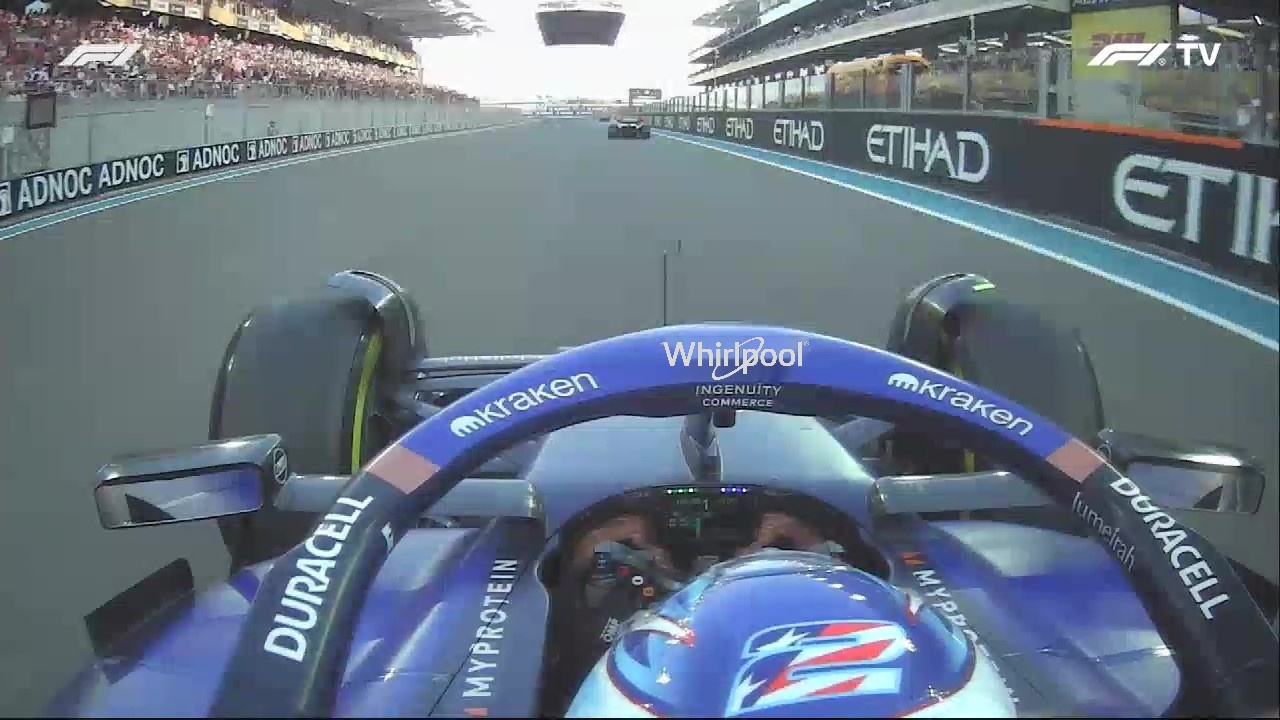

In [17]:
import cv2
import numpy as np
from google.colab import files
from IPython.display import Image, display

def paste_image(background_path, overlay_path, mask_path, output_path, intensity=1.0):
    # Read the background image
    background = cv2.imread(background_path)

    # Read the overlay image with an alpha channel
    overlay = cv2.imread(overlay_path, cv2.IMREAD_UNCHANGED)

    # Read the binary mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Convert images and mask to uint8
    background = background.astype(np.uint8)
    mask = mask.astype(np.uint8)

    # Find contours in the mask to get the bounding box
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Get the bounding box of the mask
        x, y, w, h = cv2.boundingRect(contours[0])

        # Resize overlay to fit inside the bounding box
        overlay = cv2.resize(overlay, (w, h))

        # Extract the region of interest from the background using the mask
        bg_roi = background[y:y+h, x:x+w]

        # Extract the region of interest from the overlay using the mask
        overlay_roi = overlay[:h, :w]

        # Extract the alpha channel from the overlay
        alpha_channel = overlay_roi[:, :, 3] / 255.0

        # Blend the overlay with the background using the adjusted alpha channel
        for c in range(0, 3):
            bg_roi[:, :, c] = bg_roi[:, :, c] * (1 - alpha_channel) + overlay_roi[:, :, c] * alpha_channel * intensity

        # Update the background with the blended result
        background[y:y+h, x:x+w] = bg_roi

    # Save the output image
    cv2.imwrite(output_path, background)

# Mention the paths to your images
background_image_path = '/content/drive/MyDrive/blending_logo_for_blue_car/inpainted_img.jpg'
overlay_image_path = '/content/drive/MyDrive/blending_logo_for_blue_car/whirlpool.png'
mask_image_path = '/content/drive/MyDrive/blending_logo_for_blue_car/mask.png'
output_image_path = 'output.jpg'

# Set the desired intensity value (adjust as needed)
intensity = 0.85

# Perform image paste with intensity adjustment
paste_image(background_image_path, overlay_image_path, mask_image_path, output_image_path, intensity)

# Display the result
display(Image(filename=output_image_path))


In [19]:
import cv2
import numpy as np

def paste_video_with_intensity(background_path, overlay_path, mask_path, output_path, intensity=1.0):
    # Open the background video
    cap_background = cv2.VideoCapture(background_path)
    fps = int(cap_background.get(cv2.CAP_PROP_FPS))
    width = int(cap_background.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap_background.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Read the overlay image with an alpha channel
    overlay = cv2.imread(overlay_path, cv2.IMREAD_UNCHANGED)

    # Read the binary mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Convert overlay and mask to uint8
    overlay = overlay.astype(np.uint8)
    mask = mask.astype(np.uint8)

    # Find contours in the mask to get the bounding box
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Get the bounding box of the mask
        x, y, w, h = cv2.boundingRect(contours[0])

        # Resize overlay to fit inside the bounding box
        overlay = cv2.resize(overlay, (w, h))

    # Create VideoWriter object to save the output
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while True:
        ret, frame_background = cap_background.read()

        if not ret:
            break

        # Extract the region of interest from the background using the mask
        bg_roi = frame_background[y:y+h, x:x+w]

        # Extract the region of interest from the overlay using the mask
        overlay_roi = overlay[:h, :w]

        # Extract the alpha channel from the overlay (create one if not present)
        alpha_channel = overlay_roi[:, :, 3] / 255.0 if overlay_roi.shape[2] == 4 else np.ones((h, w), dtype=np.uint8)

        # Blend the overlay with the background using the adjusted alpha channel and intensity
        for c in range(0, 3):
            bg_roi[:, :, c] = bg_roi[:, :, c] * (1 - alpha_channel) + overlay_roi[:, :, c] * alpha_channel * intensity

        # Update the background frame with the blended result
        frame_background[y:y+h, x:x+w] = bg_roi

        # Write the frame to the output video
        out.write(frame_background)

    # Release video capture and writer objects
    cap_background.release()
    out.release()

# Mention the paths to your video file and overlay images
background_video_path = '/content/drive/MyDrive/blending_logo_for_blue_car/inpainted_video.mp4'
overlay_image_path = '/content/drive/MyDrive/blending_logo_for_blue_car/whirlpool.png'
mask_image_path = '/content/drive/MyDrive/blending_logo_for_blue_car/mask.png'
output_video_path = '/content/drive/MyDrive/blending_logo_for_blue_car/output_video.mp4'

# Set the desired intensity value (adjust as needed)
intensity = 0.8

# Perform video processing with intensity adjustment
paste_video_with_intensity(background_video_path, overlay_image_path, mask_image_path, output_video_path, intensity)
